<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/deeplearning.ai/nlp/principal_component_analysis_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

PCA is based on the `Singular Value Decomposition(SVD)` of the `Covariance Matrix` of the original dataset. The `Eigenvectors` of such decomposition are used as a **rotation matrix**. The Eigenvectors are arranged in the rotation matrix in decreasing order according to its **explained variance**. This last term is related to `EigenValues` of the SVD.

PCA is a potent technique with applications ranging from simple space transformation, dimensionality reduction, and mixture separation from spectral information.

<img src="https://dbjxwcks.labs.coursera.org/notebooks/GaussianScatterPCA.svg">



In [16]:
import math
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

from sklearn.decomposition import PCA

random.seed(100)


To start, let us consider a pair of random variables $x$, $y$. Consider the base case $y=n*x$. The $x$ and $y$ variables will be perfectly correlated to each other since $y$ is just a scaling of $x$.

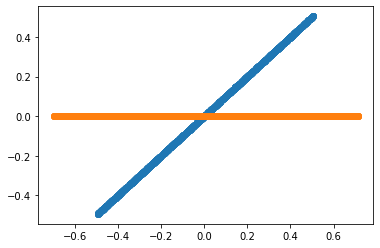

In [4]:
n = 1
x = np.random.uniform(1, 2, 1000)
y = x.copy() * n

# PCA works better if the data is centered
x = x - np.mean(x)
y = y - np.mean(y)

data = pd.DataFrame({'x': x, 'y': y})
plt.scatter(data.x, data.y)

# instantiate a PCA. Choose to get 2 outputs variables
pca = PCA(n_components=2)

# crate athe transformation model for this data. Internally, it gets the  
# rotation matrix and the explained variance
pcaTr = pca.fit(data)

rotatedData = pcaTr.transform(data)
dataPCA = pd.DataFrame(data=rotatedData, columns=['PC1', 'PC2'])

plt.scatter(dataPCA.PC1, dataPCA.PC2);

Now, what is the direction in which the variables point?

## Understanding the transformation model pcaTr

As mentioned before, a PCA model is composed of a rotation matrix and its corresponding explained variance. In the next module, we will explain the details of the rotation matrices.

- `pcaTr.components_` has the rotation matrix
- `pcaTr.explained_variance_` has the explained variance of each principal component

In [13]:
print('Eigenvectors or principal component: First row must be in the direction of [1. n]')
print(pcaTr.components_)

Eigenvectors or principal component: First row must be in the direction of [1. n]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


$cos(45^o) = sin(45^o) = 0.7071$

The rotation matrix is equal to:

$$R = \begin{bmatrix} cos(45^o) & sin(45^o) \\ -sin(45^o) & cos(45^o) \end{bmatrix}$$ 

And $45^o$ is the same angle that form the variables y = 1 * x.

Then, PCA has identified the angle in which point the original variables.

In [14]:
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

Eigenvalues or explained variance
[1.63579279e-01 4.10868280e-33]


And the explained Variance is around [0.166 0]. Remember that the Variance of a uniform random variable x ~ U(1, 2), as our x and y, is equal to:

$$Var(x) = \frac {(2 - 1)^2}{12} = 0.083333$$
    
Then the explained variance given by the PCA can be interpret as

$$[Var(x) + Var(y) \ 0] = [0.0833 + 0.0833 \  0] = [0.166 \ 0]$$

Which means that all the explained variance of our new system is explained by our first principal component. 

## Correlated Normal Random Variables.

Now, we will use a controlled dataset composed of 2 random variables with different variances and with a specific Covariance among them. The only way I know to get such a dataset is, first, create two independent Normal random variables with the desired variances and then combine them using a rotation matrix. In this way, the new resulting variables will be a linear combination of the original random variables and thus be dependent and correlated.

In [7]:
std1 = 1
std2 = 0.333

x = np.random.normal(0, std1, 1000)
y = np.random.normal(0, std1, 1000)

0     -9.918571e-17
1      6.984902e-17
2      1.108112e-16
3      8.501632e-17
4     -3.577745e-17
           ...     
995   -2.117461e-17
996   -7.313886e-18
997    7.283808e-17
998    1.630166e-17
999    6.532348e-17
Name: PC2, Length: 1000, dtype: float64